# EDA2 - Capstone Project - Automatic Ticket Classsification - Using NLP

Due to demanding computing resources required for text processing and also for large dimensions of data after vectorization; had to reduce the dataset size to 15000 rows.

Note: 16GB Ram was not enough

In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import spacy
from spacy.tokenizer import Tokenizer
import en_core_web_md


from sklearn.model_selection import train_test_split
import re
from spacy import displacy
import string
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the csv as pandas Data Frame(saved final file of 1st notebook)
df = pd.read_csv(r"C:\Users\Raveena's PC\Documents\Data_Science\Capstone Project\df_modelling.csv")

In [10]:
df_short = df.sample(15000, random_state = 42, ignore_index = True)

In [14]:
df_short.head()

,lemma_comp,sentence_length,word_count,category
0,loan modification collection foreclosure,1,4,1
1,chase bank charge insufficient fund fee ...,8,226,3
2,mail check $ landlord check rent /2015 n...,24,432,3
3,problem fee fee interest,1,7,2
4,company close account close account,1,8,3


In [12]:
df_short = df_short.drop(columns = "Unnamed: 0")

1    4931
3    4105
2    4086
4    1510
5     368
Name: category, dtype: int64

In [36]:
# Assign categories names to numerical values
df_short["category"] = df_short["category"].replace({1:"Mortgage or Loans",
                                           2:"Credit card or prepaid card",
                                           3:"Account Services",
                                           4:"Debt COllection or credit reporting", 
                                           5:"Other financial services"})

In [40]:
df_short.category.value_counts()

Mortgage or Loans                      4931
Account Services                       4105
Credit card or prepaid card            4086
Debt COllection or credit reporting    1510
Other financial services                368
Name: category, dtype: int64

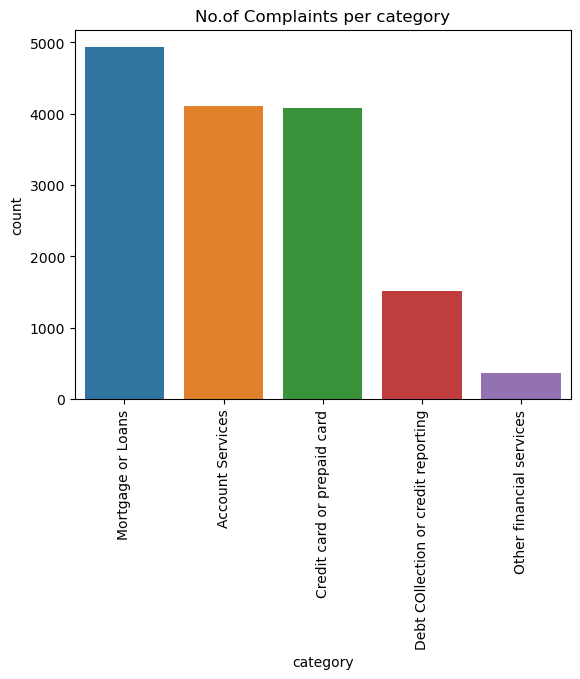

In [45]:
#visualise category count
sns.countplot(x = "category", data = df_short, order = df_short["category"].value_counts().index).set_title("No.of Complaints per category")
plt.xticks(rotation=90);

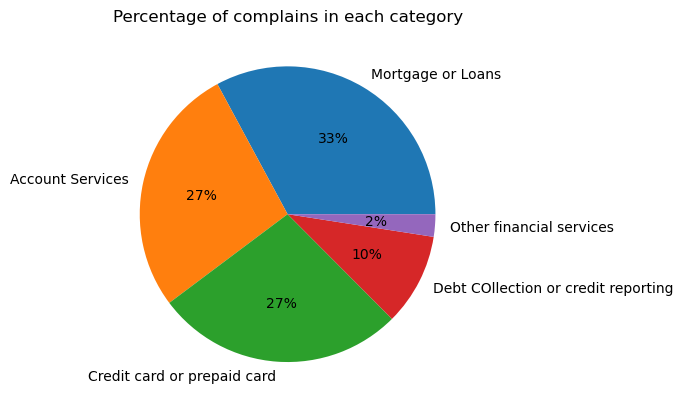

In [43]:
labels = ["Mortgage or Loans", "Account Services", "Credit card or prepaid card", "Debt COllection or credit reporting", "Other financial services"]
plt.pie(df_short.category.value_counts(), labels = labels, autopct='%.0f%%')
plt.title("Percentage of complains in each category")
plt.show()

In [48]:
# Assign numerical values to the categories
df_short["category"] = df_short["category"].replace({"Mortgage or Loans":1,
                                           "Credit card or prepaid card":2,
                                           "Account Services":3,
                                           "Debt COllection or credit reporting":4, 
                                           "Other financial services":5})

## Word clouds for each category

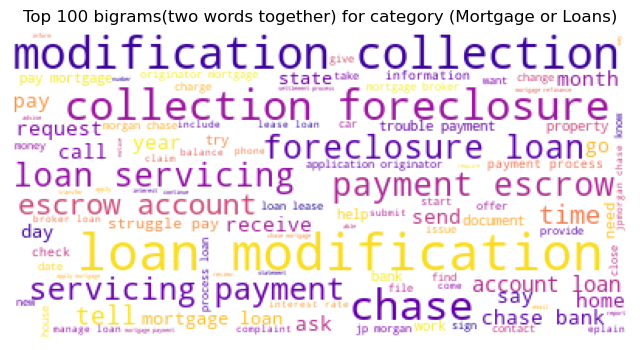

In [57]:
#WordCould for category "Mortgage or Loans"
Mortgage_text = df_short[df_short["category"]==1]["lemma_comp"].str.cat()

wordcloud_m = WordCloud(max_words=100, colormap="plasma", background_color = "white").generate(Mortgage_text)
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud_m)
plt.title("Top 100 bigrams(two words together) for category (Mortgage or Loans)")
plt.axis("off")
plt.show()


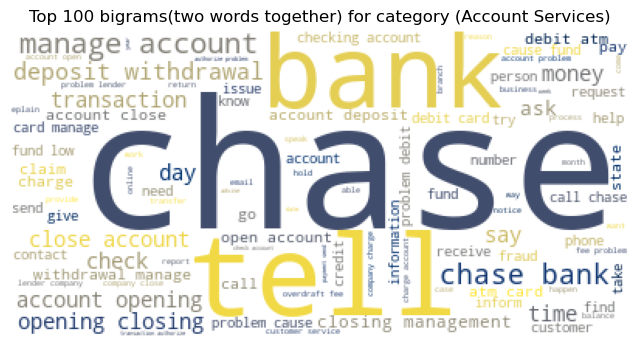

In [53]:
#WordCould for category "Account Services"
Account_Services_text = df_short[df_short["category"]==3]["lemma_comp"].str.cat()

wordcloud_as = WordCloud(max_words=100, colormap = "cividis", background_color = "white").generate(Account_Services_text)
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud_as)
plt.title("Top 100 bigrams(two words together) for category (Account Services)")
plt.axis("off")
plt.show()

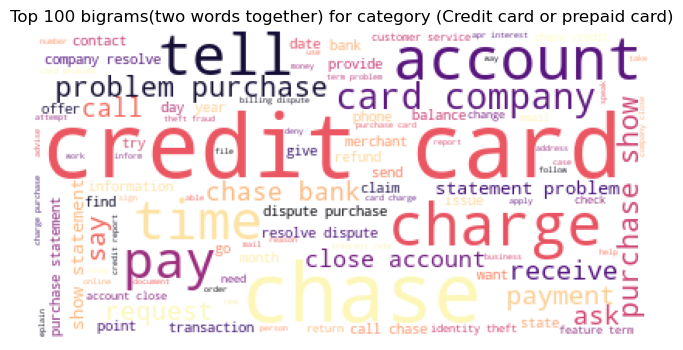

In [54]:
#WordCould for category "Credit card or prepaid card"
cc_pp_text = df_short[df_short["category"]==2]["lemma_comp"].str.cat()

wordcloud_cc_pp = WordCloud(max_words=100, colormap = "magma", background_color = "white").generate(cc_pp_text)
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud_cc_pp)
plt.title("Top 100 bigrams(two words together) for category (Credit card or prepaid card)")
plt.axis("off")
plt.show()

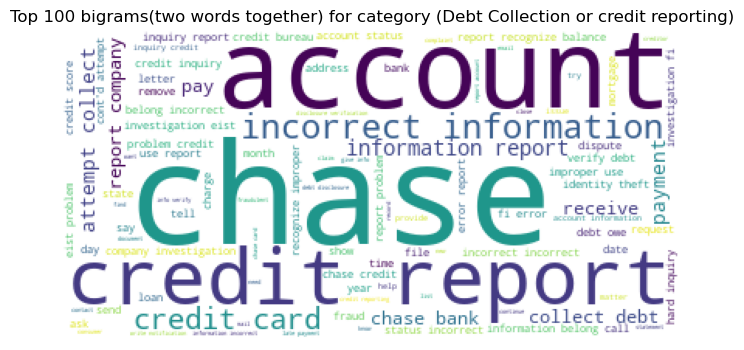

In [55]:
#WordCould for category "Debt COllection or credit reporting"
collection_text = df_short[df_short["category"]==4]["lemma_comp"].str.cat()

wordcloud_col = WordCloud(max_words=100, colormap = "viridis", background_color = "white").generate(collection_text)
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud_col)
plt.title("Top 100 bigrams(two words together) for category (Debt Collection or credit reporting)")
plt.axis("off")
plt.show()

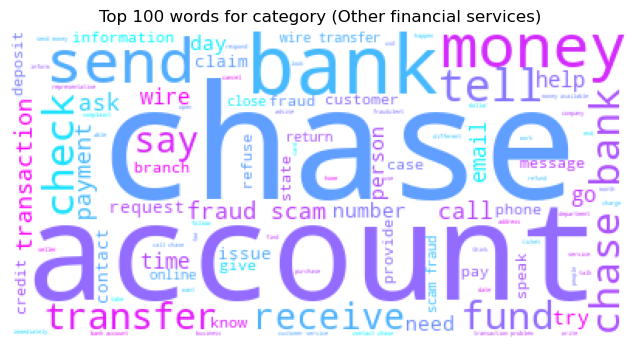

In [50]:
#WordCould for category "Other financial services"
financial_services_text = df_short[df_short["category"]==5]["lemma_comp"].str.cat()

wordcloud_fin = WordCloud(max_words=100, colormap = "cool", background_color = "white").generate(financial_services_text)
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud_fin)
plt.title("Top 100 words for category (Other financial services)")
plt.axis("off")
plt.show()

### Vectorization and Modelling continued in the next notebook

### Note book title : "Modelling_Capstone_3"
                                        